In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
# # Creating a manageable v small list bc ...scared
# small_list = cities[:15]
# small_list

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
city_with_data = []

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

counter = 0


for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    city_response = requests.get(query_url)
    city_json = city_response.json()
    
    try:
        city_data = city_json
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        city_with_data.append(city_data['name'])
        
        counter += 1
        if counter == 51:
            time.sleep(60)
            print(f'Zzzz...Counter Reset')
            counter = 1
    
        print(f"This is pull {counter} for {city} data.")
    
    except KeyError:
        print(f"Oops, no data for {city}.")

    

This is pull 1 for fairbanks data.
This is pull 2 for atuona data.
This is pull 3 for jamestown data.
This is pull 4 for port alfred data.
This is pull 5 for auki data.
This is pull 6 for thompson data.
This is pull 7 for petropavlovsk-kamchatskiy data.
This is pull 8 for mataura data.
This is pull 9 for rikitea data.
This is pull 10 for ascension data.
This is pull 11 for kaitangata data.
This is pull 12 for isangel data.
This is pull 13 for butaritari data.
Oops, no data for dera din panah.
This is pull 14 for coquimbo data.
This is pull 15 for gornopravdinsk data.
This is pull 16 for tasiilaq data.
This is pull 17 for mbekenyera data.
This is pull 18 for ugoofaaru data.
This is pull 19 for chuy data.
Oops, no data for umzimvubu.
This is pull 20 for cabo san lucas data.
This is pull 21 for coihaique data.
This is pull 22 for rochegda data.
This is pull 23 for saldanha data.
This is pull 24 for vaini data.
This is pull 25 for margate data.
This is pull 26 for east london data.
This is

This is pull 12 for soyo data.
This is pull 13 for yar-sale data.
This is pull 14 for saint-augustin data.
This is pull 15 for gamba data.
This is pull 16 for kirakira data.
This is pull 17 for aruppukkottai data.
This is pull 18 for longonjo data.
This is pull 19 for grand gaube data.
This is pull 20 for mitsamiouli data.
This is pull 21 for sungai besar data.
This is pull 22 for vangaindrano data.
This is pull 23 for trinidad data.
This is pull 24 for athabasca data.
This is pull 25 for calama data.
This is pull 26 for altea data.
This is pull 27 for tazovskiy data.
This is pull 28 for san patricio data.
This is pull 29 for muscat data.
This is pull 30 for ayan data.
This is pull 31 for vila franca do campo data.
This is pull 32 for ostrovnoy data.
This is pull 33 for albacete data.
This is pull 34 for mutis data.
This is pull 35 for corowa data.
This is pull 36 for abaza data.
This is pull 37 for winslow data.
This is pull 38 for hithadhoo data.
This is pull 39 for champerico data.


This is pull 31 for chimore data.
This is pull 32 for beisfjord data.
Oops, no data for lolua.
This is pull 33 for the valley data.
This is pull 34 for barranca data.
This is pull 35 for vung tau data.
This is pull 36 for salamanca data.
This is pull 37 for dubbo data.
This is pull 38 for tsumeb data.
This is pull 39 for bubaque data.
This is pull 40 for charlestown data.
This is pull 41 for pacifica data.
This is pull 42 for husavik data.
This is pull 43 for nalut data.
This is pull 44 for bandarbeyla data.
This is pull 45 for zyryanka data.
This is pull 46 for boyolangu data.
This is pull 47 for labuhan data.
This is pull 48 for haines junction data.
This is pull 49 for sioux lookout data.
This is pull 50 for havelock data.
Zzzz...Counter Reset
This is pull 1 for mount gambier data.
This is pull 2 for amga data.
This is pull 3 for ballina data.
This is pull 4 for mehamn data.
This is pull 5 for warrnambool data.
This is pull 6 for campoverde data.
This is pull 7 for cidreira data.
Th

In [5]:
city_dict = {
    "city" : city_with_data,
    "lat" : lat,
    "lng" : lng,
    "max temp" : max_temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind speed" : wind_speed,
    "country id" : country,
    "date" : date
}

city_df = pd.DataFrame(city_dict)
city_df.head()


,city,lat,lng,max temp,humidity,cloudiness,wind speed,country id,date
0,Fairbanks,64.8378,-147.7164,4.96,56,75,11.50,US,1643404254
1,Atuona,-9.8000,-139.0333,77.59,72,15,15.84,PF,1643404399
2,Jamestown,42.0970,-79.2353,20.08,61,100,3.00,US,1643404322
3,Port Alfred,-33.5906,26.8910,67.77,76,17,9.71,ZA,1643404332
4,Auki,-8.7676,160.7034,79.54,86,96,7.27,SB,1643404457


In [6]:
city_df.to_csv('output_data/weatherpy_data.csv')

In [7]:
# city_df.info()

In [8]:
city_summary = city_df.describe()

city_summary

,lat,lng,max temp,humidity,cloudiness,wind speed,date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.357747,16.514038,50.883267,73.355717,61.509982,8.272541,1.643405e+09
std,33.204363,91.594928,30.393913,20.490986,39.905700,6.043219,2.547126e+02
min,-54.800000,-175.200000,-42.030000,11.000000,0.000000,0.000000,1.643404e+09
25%,-8.229300,-65.117800,30.260000,61.000000,20.000000,3.850000,1.643405e+09
50%,25.281900,18.501200,61.840000,77.000000,75.000000,6.910000,1.643405e+09
75%,47.438350,102.389850,76.530000,89.000000,100.000000,11.070000,1.643405e+09
max,78.218600,179.316700,91.450000,100.000000,100.000000,40.290000,1.643405e+09


In [9]:
over_hun = city_df.loc[city_df["humidity"] > 100]
city_df = city_df.loc[city_df["humidity"] != 100]

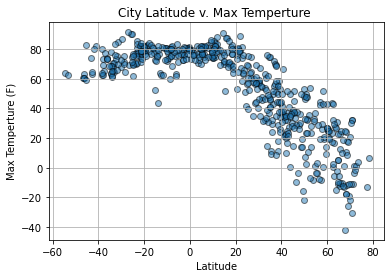

In [10]:
plt.scatter(city_df["lat"], city_df["max temp"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Max Temperture ')
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")

plt.savefig("images/city_lat_temp.png")

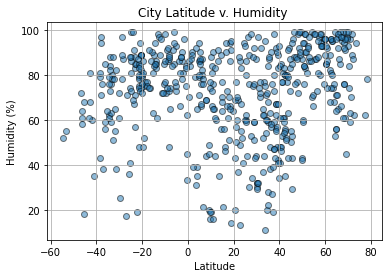

In [11]:
plt.scatter(city_df["lat"], city_df["humidity"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Humidity ')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("images/city_lat_humidity.png")

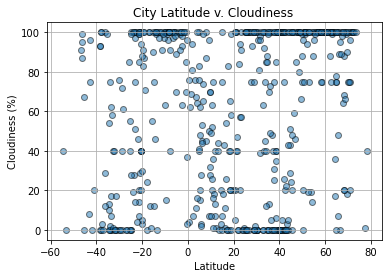

In [12]:
plt.scatter(city_df["lat"], city_df["cloudiness"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Cloudiness ')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("images/city_lat_cloudiness.png")

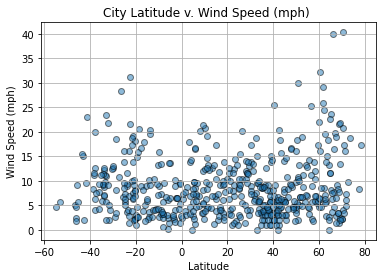

In [13]:
plt.scatter(city_df["lat"], city_df["wind speed"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Wind Speed (mph) ')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("images/city_lat_windspeed.png")

In [14]:
northernhem = city_df.loc[(city_df["lat"] >= 0)]

In [15]:
southernhem = city_df.loc[(city_df["lat"] <= 0)]

The r-squared is: 0.7427487398997442


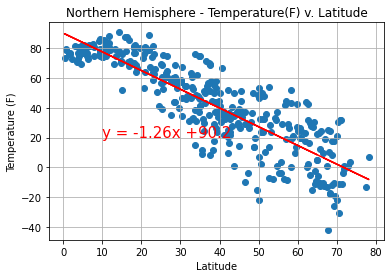

In [16]:
# Northern Hemisphere - Temperature (F) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["max temp"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["max temp"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Temperature(F) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (10, 20), fontsize = 15, color = "red")

plt.savefig("images/north_lat_temp.png")


The r-squared is: 0.1207750110622039


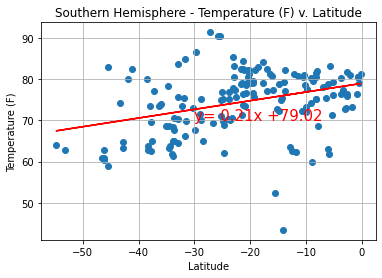

In [17]:
# Southern Hemisphere - Temperature (F) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["max temp"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["max temp"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Temperature (F) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (-30, 70), fontsize = 15, color = "red")

plt.savefig("images/south_lat_temp.png")

The r-squared is: 0.10295681101567278


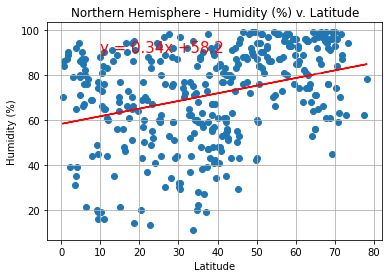

In [18]:
# Northern Hemisphere - Humidity (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["humidity"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["humidity"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Humidity (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (10, 90), fontsize = 15, color = "red")

plt.savefig("images/north_lat_humidity.png")

The r-squared is: 0.11455194166088603


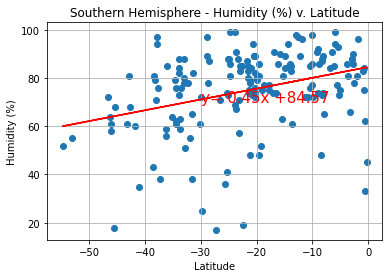

In [19]:
# Southern Hemisphere - Humidity (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["humidity"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["humidity"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Humidity (%) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-30, 70), fontsize = 15, color = "red")

plt.savefig("images/south_lat_humidity.png")

The r-squared is: 0.12093340339701546


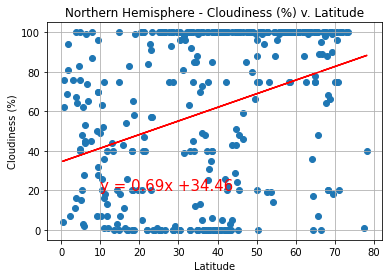

In [20]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["cloudiness"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["cloudiness"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Cloudiness (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (10, 20), fontsize = 15, color = "red")

plt.savefig("images/north_lat_cloudiness.png")

The r-squared is: 0.184457081442827


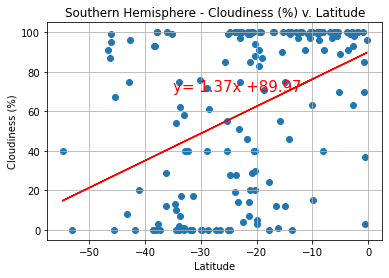

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["cloudiness"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["cloudiness"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Cloudiness (%) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (-35, 70), fontsize = 15, color = "red")

plt.savefig("images/south_lat_cloudiness.png")

The r-squared is: 0.02538898877961698


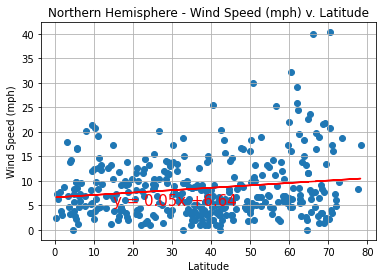

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["wind speed"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["wind speed"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Wind Speed (mph) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (15, 5.0), fontsize = 15, color = "red")

plt.savefig("images/north_lat_windspeed.png")


The r-squared is: 0.03572278352931864


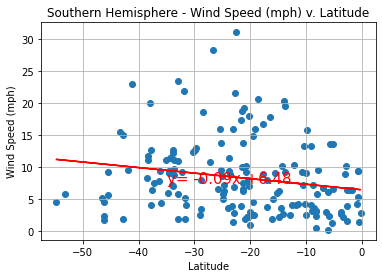

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["wind speed"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["wind speed"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Wind Speed (mph) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (-35, 7.5), fontsize = 15, color = "red")

plt.savefig("images/south_lat_windspeed.png")